In [1]:
import acl
import numpy as np
from PIL import Image, ImageDraw
from acl_sample import Sample
import struct
from constant import NPY_BYTE, ACL_MEMCPY_DEVICE_TO_HOST, ACL_MEM_MALLOC_NORMAL_ONLY, ACL_MEMCPY_HOST_TO_DEVICE
from postprocessing import postprocess_boxes
import cv2
import matplotlib.pyplot as plt

In [3]:
device_id = 0
input_size = 416
model_path = "./model/yolov3_caffe.om"
img_dict = {"path": "./data/shot.jpg", "dtype": np.uint8}

In [4]:
sample = Sample(device_id,
                model_path,
                input_size,
                input_size)

[Sample] init resource stage:
[Sample] init resource stage success
[Model] class Model init resource stage:
model output size 2
output  0
model output dims ({'name': 'detection_out3:0:box_out', 'dimCount': 2, 'dims': [1, 6144]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'detection_out3:1:box_out_num', 'dimCount': 2, 'dims': [1, 8]}, 0)
model output datatype 3
model input size 2
input  0
model input dims ({'name': 'data', 'dimCount': 4, 'dims': [1, 416, 416, 3]}, 0)
model input datatype 4
model input size 259584
model input format 1
input  1
model input dims ({'name': 'img_info', 'dimCount': 2, 'dims': [1, 4]}, 0)
model input datatype 0
model input size 16
model input format 0
[Model] create model output dataset:
[Model] create model output dataset success
[Model] class Model init resource stage success


In [ ]:
[w, h, 3]

In [ ]:
boxes = sample.infer(img)

In [107]:
# def transfer_pic(input_path):
# #     input_path = os.path.abspath(input_path)
#     im = Image.open(input_path)
#     im = im.resize((416, 416))
#     # hwc
#     img = np.array(im)
#     height = img.shape[0]
#     width = img.shape[1]
#     h_off = int((height - 224) / 2)
#     w_off = int((width - 224) / 2)
# #     crop_img = img[h_off:height - h_off, w_off:width - w_off, :]
#     crop_img = img
#     # rgb to bgr
#     img = crop_img[:, :, ::-1]
#     shape = img.shape
#     print(shape)
#     img = img.astype("float16")
#     img[:, :, 0] -= 104
#     img[:, :, 1] -= 117
#     img[:, :, 2] -= 123
#     img = img.reshape([1] + list(shape))
# #     result = img.transpose([0, 3, 1, 2])
#     return img

In [108]:
# img_resized = transfer_pic(img_dict["path"])
# ptr = acl.util.numpy_to_ptr(img_resized[0].flatten())

# img_dev_ptr, ret = acl.rt.malloc(1038336, ACL_MEM_MALLOC_NORMAL_ONLY)

# ret = acl.rt.memcpy(img_dev_ptr, 1038336, ptr, 1038336, ACL_MEMCPY_HOST_TO_DEVICE)

# model_output = sample.model_process.run(img_dev_ptr, 1038336)

In [109]:
# im_rgb = cv2.cvtColor(cv2.imread(img_dict["path"]), cv2.COLOR_BGR2RGB)
# im_rgb[:, : , 0] -= 123
# im_rgb[:, : , 1] -= 117
# im_rgb[:, : , 2] -= 104
# im_rgb_resized = cv2.resize(im_rgb, (416, 416))
# # / 255

# img_host_ptr = acl.util.numpy_to_ptr(im_rgb_resized)

# im_rgb_resized.flatten().shape

# img_dev_ptr, ret = acl.rt.malloc(519168, ACL_MEM_MALLOC_NORMAL_ONLY)

# ret = acl.rt.memcpy(img_dev_ptr, 519168, img_host_ptr, 519168, ACL_MEMCPY_HOST_TO_DEVICE)

# model_output = sample.model_process.run(img_dev_ptr, 519168)

In [5]:
img_dict

{'path': './data/shot.jpg', 'dtype': numpy.uint8}

In [21]:
%timeit -n 100 -r 10 model_output = sample.forward(img_dict)

[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729627619328
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729627881472
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729628143616
dvpp_output_size 259584
[Model] create model input data

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729640202240
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729640464384
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729640726528
dvpp_output_size 259584
[

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729648590848
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729648852992
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729649115136
dvpp_output_size 259584
[

[Dvpp] vpc resize stage success
dvpp_output_buffer 17729656717312
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729656979456
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729657241600
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] ima

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729665368064
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729665630208
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729665892352
dvpp_output_size 259584
[

[Dvpp] vpc resize stage success
dvpp_output_buffer 17729673756672
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729674018816
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729674280960
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] ima

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729682407424
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729682669568
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729682931712
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729690796032
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729691058176
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729691320320
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729699184640
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729699446784
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729699708928
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729707573248
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729707835392
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729708097536
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729715961856
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729716224000
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729716486144
dvpp_output_size 259584
[

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729724350464
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729724612608
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729724874752
dvpp_output_size 259584
[

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729732476928
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729732739072
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729733001216
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729740865536
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729741127680
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729741389824
dvpp_output_size 259584
[

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729748992000
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729749254144
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729749516288
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729757380608
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729757642752
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729757904896
dvpp_output_size 259584
[

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729765507072
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729765769216
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729766031360
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729773895680
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729774157824
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729774419968
dvpp_output_size 259584
[

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729782022144
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729782284288
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729782546432
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729790410752
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729790672896
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729790935040
dvpp_output_size 259584
[

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729798799360
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729799061504
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729799323648
dvpp_output_size 259584
[

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729807187968
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729807450112
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729807712256
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729815576576
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729815838720
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729816100864
dvpp_output_size 259584
[

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729823965184
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729824227328
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729824489472
dvpp_output_size 259584
[

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729832353792
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729832615936
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729832878080
dvpp_output_size 259584
[

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729840742400
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729841004544
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729841266688
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729849131008
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729849393152
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729849655296
dvpp_output_size 259584
[

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729857257472
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729857519616
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729857781760
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729865646080
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729865908224
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729866170368
dvpp_output_size 259584
[

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729874034688
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729874296832
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729874558976
dvpp_output_size 259584
[

[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729882423296
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729882685440
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729882947584
dvpp_output_size 259584
[

[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729890549760
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729890811904
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[Sample] width:1920 height:1080
[Sample] image:./data/shot.jpg
[Dvpp] vpc decode stage:
[Dvpp] vpc decode stage success
[Dvpp] vpc resize stage:
[Dvpp] vpc resize stage success
dvpp_output_buffer 17729891074048
dvpp_output_size 259584
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute s

In [8]:
acl.mdl.get_dataset_num_buffers(model_output)

2

In [9]:
def get_model_output_by_index(model_output, i, num_classes = 80):
    temp_output_buf = acl.mdl.get_dataset_buffer(model_output, i)

    infer_output_ptr = acl.get_data_buffer_addr(temp_output_buf)
    infer_output_size = acl.get_data_buffer_size(temp_output_buf)
    print("infer_output_size", infer_output_size)
    
    output_host, _ = acl.rt.malloc_host(infer_output_size)
    acl.rt.memcpy(output_host, infer_output_size, infer_output_ptr,
                          infer_output_size, ACL_MEMCPY_DEVICE_TO_HOST)
    
    result = acl.util.ptr_to_numpy(output_host, (infer_output_size,), NPY_BYTE)
    return np.array(struct.unpack(f"{infer_output_size//4}f", bytearray(result)), dtype=np.float32)
# .reshape(-1, 255)

In [10]:
temp_output_buf = acl.mdl.get_dataset_buffer(model_output, 1)

infer_output_ptr = acl.get_data_buffer_addr(temp_output_buf)
infer_output_size = acl.get_data_buffer_size(temp_output_buf)
print("infer_output_size", infer_output_size)

output_host, _ = acl.rt.malloc_host(infer_output_size)
acl.rt.memcpy(output_host, infer_output_size, infer_output_ptr,
                      infer_output_size, ACL_MEMCPY_DEVICE_TO_HOST)

result = acl.util.ptr_to_numpy(output_host, (infer_output_size,), NPY_BYTE)
box_out_num = struct.unpack(f"{infer_output_size//4}I", bytearray(result))

infer_output_size 32


In [14]:
box_out

array([ 3.6000000e+02,  3.8175000e+02,  4.4100000e+02, ...,
       -4.7058105e-02,  1.6738281e+00,  2.2045898e-01], dtype=float32)

In [11]:
box_out = get_model_output_by_index(model_output, 0)

infer_output_size 24576


In [15]:
box_out_num

(1,
 1425036528,
 1425036528,
 1425036528,
 1425036528,
 1425036528,
 1425036528,
 1425036528)

In [16]:
objNum = box_out_num[0]
boxes = []
for k in range(objNum):
    pos = 0
    leftTopX = box_out[objNum * (pos) + k]
    pos += 1
    leftTopY = box_out[objNum * (pos) + k]
    pos += 1
    rightBotX = box_out[objNum * (pos) + k]
    pos += 1
    rightBotY = box_out[objNum * (pos) + k]
    pos += 1
    confidence = box_out[objNum * (pos) + k]
    pos += 1
    classId = box_out[objNum * (pos) + k]
    pos += 1
    print(leftTopX, leftTopY, rightBotX, rightBotY, confidence, classId)
    boxes.append([leftTopX, leftTopY, rightBotX, rightBotY])

360.0 381.75 441.0 482.75 0.8022461 32.0


In [17]:
boxes

[[360.0, 381.75, 441.0, 482.75]]

In [18]:
img = Image.open(img_dict["path"])

In [19]:
img1 = ImageDraw.Draw(img)
for box in boxes:
    img1.rectangle(box, outline ="blue", width=4)

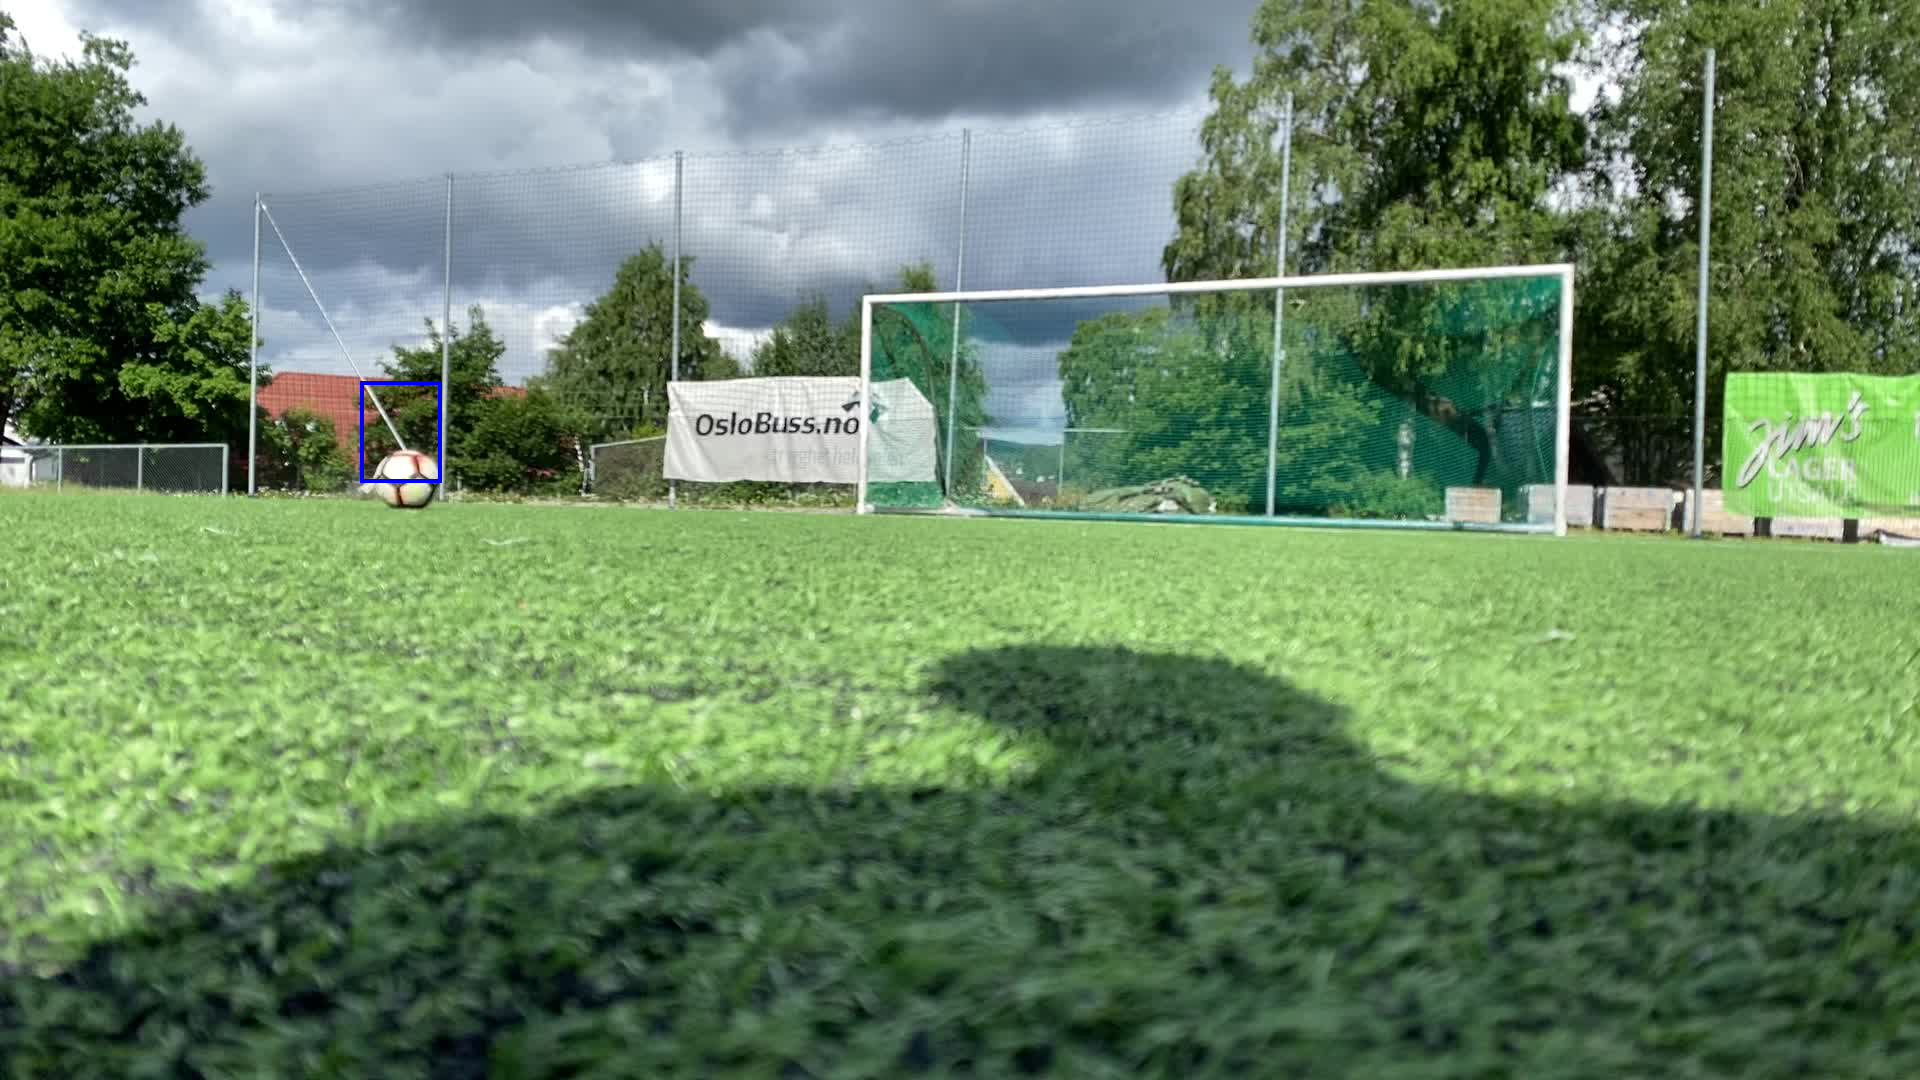

In [20]:
img